In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D
from tensorflow.keras.layers import Input,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.callbacks import EarlyStopping

In [5]:
train = list(os.walk(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\train")) 

In [6]:
label_names = train[0][1]
dict_labels = dict(zip(label_names, list(range(len(label_names)))))
print(dict_labels)

{'cloth': 0, 'n95': 1, 'n95v': 2, 'nfm': 3, 'srg': 4}


In [7]:
def dataset(path): 
    images = []
    labels = []
    for folder in os.listdir(path):
        value_of_label = dict_labels[folder] 

        for file in (os.listdir(os.path.join(path, folder))):
            path_of_file = os.path.join(os.path.join(path, folder), file)

            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            images.append(image)
            labels.append(value_of_label)

    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels

images, labels = dataset(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\train")
images, labels = shuffle(images, labels)

In [8]:
images.shape

(1956, 224, 224, 3)

In [9]:
labels.shape

(1956,)

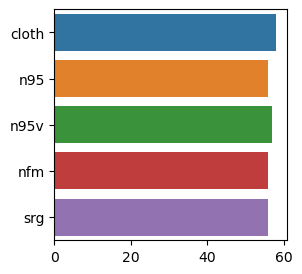

In [10]:
types_of_mask= train[0][1]
no_of_masks = []
for _ in range(1,6):
    no_of_masks.append(len(train[_][0]))
plt.figure(figsize = (3,3))
sns.barplot(y = types_of_mask, x = no_of_masks);

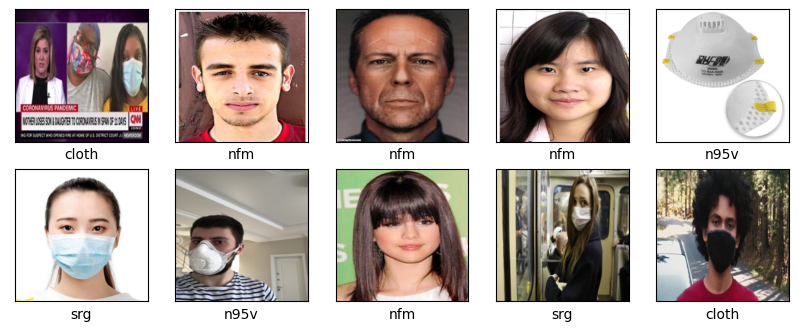

In [11]:
plt.figure(figsize = (10,10))
for _ in range(10):
    plt.subplot(5, 5, _+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = images[_]
    plt.xlabel(label_names[labels[_]])
    plt.imshow(data);

In [14]:
image_size = (299, 299)
batch_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.4,        #Shear Intensity
                            zoom_range = 0.4,         #Range for random zoom
                            horizontal_flip = True,   #Randomly flip inputs horizontally. 
                            validation_split = 0.15,  #Fraction of images reserved for validation
                            rotation_range=20,        #Degree range for random rotations.    
                            width_shift_range=0.2,
                            height_shift_range=0.2)

In [15]:
train_ds = train_datagen.flow_from_directory(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\train",
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'training',
                                      color_mode="rgb")

val_ds = train_datagen.flow_from_directory(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\test",
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'validation',
                                      color_mode="rgb")

Found 1664 images belonging to 5 classes.
Found 47 images belonging to 5 classes.


In [16]:
train_ds.class_indices

{'cloth': 0, 'n95': 1, 'n95v': 2, 'nfm': 3, 'srg': 4}

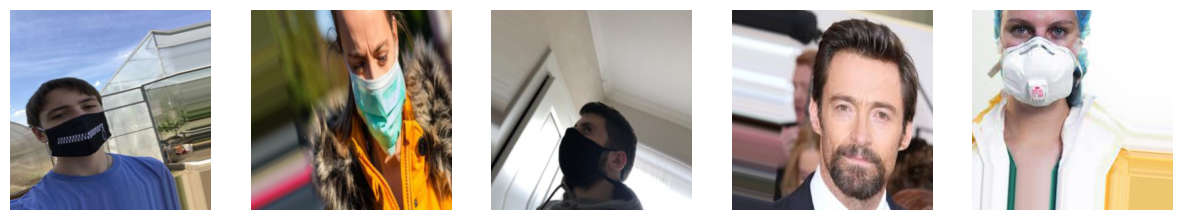

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

for i in range(5):
    image = next(train_ds)[0][0]
    image = np.squeeze(image)
    ax[i].imshow(image)
    ax[i].axis(False)

# #InceptionV3(299.299.3)

In [18]:
from keras.applications import InceptionV3
from keras.layers import Input, Flatten, Dense, Activation
from keras.models import Model

In [19]:


input_shape = (299, 299, 3)
input_layer = Input(shape=input_shape, name='input_layer')

m_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_layer)
basem_output = m_model.output

x = Flatten()(basem_output)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dense(64)(x)
x = Activation('relu')(x)
final_output = Dense(5, activation='softmax')(x)

inception_model = Model(inputs=input_layer, outputs=final_output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [20]:
inception_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │         864 │ input_layer[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │          96 │ conv2d[0][0]                   │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │           0 │ batch_normalization[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │       9,216 │ activation[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │          96 │ conv2d_1[0][0]                 │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │           0 │ batch_normalization_1[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │      18,432 │ activation_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │         192 │ conv2d_2[0][0]                 │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │           0 │ batch_normalization_2[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │           0 │ activation_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │       5,120 │ max_pooling2d[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │         240 │ conv2d_3[0][0]                 │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │           0 │ batch_normalization_3[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │     138,240 │ activation_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────┼─

 Total params: 38,588,709 (147.20 MB)

 Trainable params: 38,554,277 (147.07 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [21]:
inception_model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [22]:
early_stopping = EarlyStopping(
                          monitor='val_loss',      #Quantity to be monitored.
                          patience=2,              #Number of epochs with no improvement after which training will be stopped.  
                          verbose=1,               #displays messages when the callback takes an action.
                          restore_best_weights=True,#Whether to restore model weights from the epoch with the best value of the monitored quantity
                          mode="auto",)

callback = [early_stopping]

In [23]:
mob_hist=inception_model.fit(train_ds, epochs=10, validation_data=val_ds,callbacks=[callback])

Epoch 1/10


D:\Anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.3489 - loss: 1.7417 - val_accuracy: 0.1915 - val_loss: 2.1349
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - accuracy: 0.6688 - loss: 0.8255 - val_accuracy: 0.2766 - val_loss: 2.0321
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 220s 4s/step - accuracy: 0.8362 - loss: 0.4453 - val_accuracy: 0.2766 - val_loss: 1.9569
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.8882 - loss: 0.3193 - val_accuracy: 0.4043 - val_loss: 2.0145
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9177 - loss: 0.2452 - val_accuracy: 0.6383 - val_loss: 1.0807
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 224s 4s/step - accuracy: 0.9421 - loss: 0.1739 - val_accuracy: 0.6383 - val_loss: 0.9205
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.9467 - loss: 0.1476 - val_accuracy: 0.2553 - val_loss: 1.8084
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 218s 4s/step - accuracy: 0.9407 - loss: 0.1587 - val_accuracy: 0.1915 - val_loss: 2.

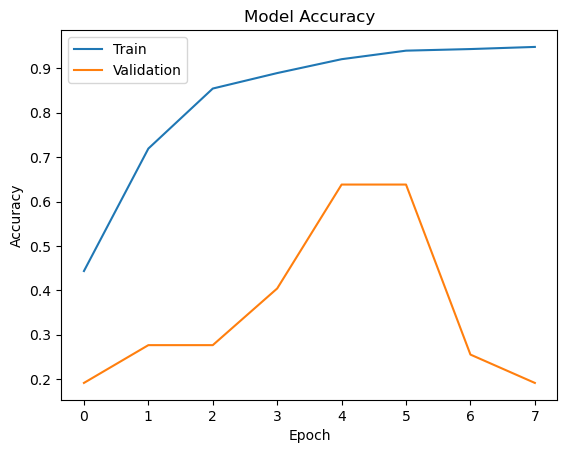

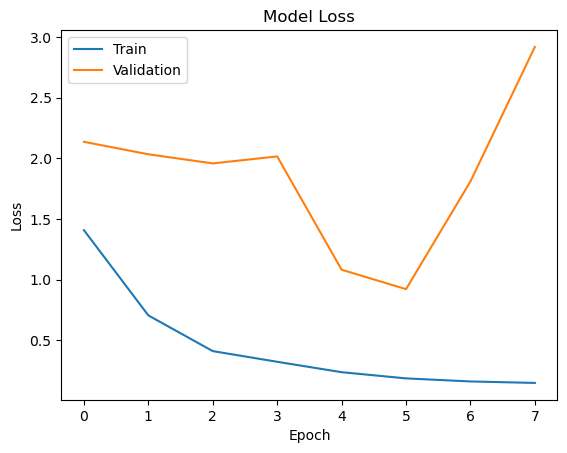

In [27]:
import matplotlib.pyplot as plt
plt.plot(mob_hist.history['accuracy'])
plt.plot(mob_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=0)
plt.show()


plt.plot(mob_hist.history['loss'])
plt.plot(mob_hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc=0)
plt.show()

In [30]:
def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (299, 299))
    image = np.array(image, dtype = 'float32')/255.0
    plt.imshow(image)
    image = image.reshape(1, 299,299,3)
    
    label_names = train_ds.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nSpecies: {1}'.format(clas, name))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The given image is of 
Class: 1 
Species: n95


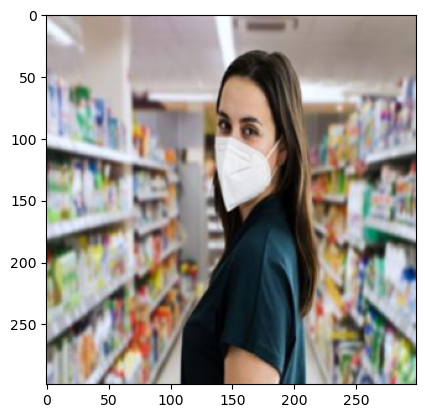

In [31]:
predictor(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\test\n95\354.jpg",inception_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The given image is of 
Class: 4 
Species: srg


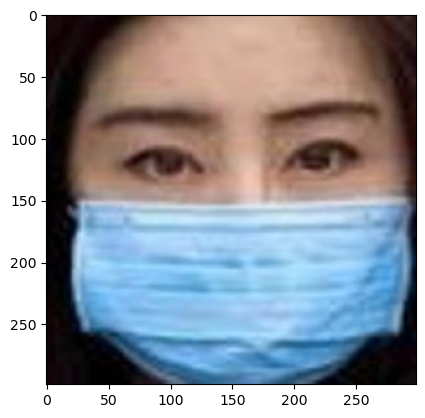

In [32]:
predictor(r"C:\Users\78658\Documents\WEEK2\archive\Dataset\test\srg\3.jpg",inception_model)

In [33]:
inception_model.save('Face_Mask_Detection—InceptionV3.h5')

D:\Anaconda\lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(
